Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*Nikita*</p>| <p style="text-align: left">*Kolesnichenko*</p> | *k11778609* |
| <p style="text-align: left">*Linda*</p>| <p style="text-align: left">*Ratz*</p> | *k1525947* |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2022)</h2>
<h1 style="text-align: center; color:rgb(0,120,170)">Assignment 2: Document Classification with Attention and Transformers</h1>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-attention"><li style="font-size:large;font-weight:bold">Task A: Document Classification with Attention (10 points)</li></a>
    <a href="#section-classification-transformer"><li style="font-size:large;font-weight:bold">Task B: Document Classification with Transformer (10 points)</li></a>
    <a href="#section-classification-bert"><li style="font-size:large;font-weight:bold">Task C: Document Classification with BERT (5 points)</li></a>
    <a href="#section-interpretation"><li style="font-size:large;font-weight:bold">Task D: Interpreting Attention Weights (3 extra points)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sequence) classification model with PyTorch using Attention networks, Transformers, and BERT. You can/should use the codes implemented in the previous assignment. Main aspects of the deep learning models in this assignment such as preprocessing, dictionary, word embeddings, data batching, loss functions, early stopping, and evaluation are explained in the previous assignment, and **are expected to be fully correct and functional in this assignment**.

The assignment has **25 points** in total as well as **3 overall extra points**. This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7) and `PyTorch` (>1.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `transformer`, `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07f0df27c017f8ea132693d61/38160/1583790728782872458/nlpwdl2022_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

It is encouraged that you log and store any information about the training and evaluation of the models in an ML dashboard like [`TensorBoard`](https://www.tensorflow.org/tensorboard) or [`wandb`](https://wandb.ai/site). This can contain any important aspect of training such as the changes in the evaluation results on validation, training loss, or learning rate. 

To this end, in the case of `TensorBoard`, after finalizing all experiments and cleaning any unnecessary experiment, publish the log files results through [`TensorBoard.dev`](https://tensorboard.dev). A simple way of doing it is by running the following command in the folder of log files:

`tensorboard dev upload --name my_exp --logdir path/to/output_dir`

`TensorBoard.dev` uploads the necessary files and provides a URL to see the TensorBoard's console. Insert the URL in the cell below.

</div>

**URL :** *EDIT!*

## Copied from previous Assignments

In [5]:
from typing import List

import pandas as pd
import numpy as np

from torch.utils.data import DataLoader, Dataset
import torch

import ast
import gensim
import gensim.downloader
import spacy

from torch.utils.tensorboard import SummaryWriter
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import os

import torch.nn.functional as F

from a1_preproc import *  # using preprocessing functions from previous year

glove = gensim.downloader.load('glove-wiki-gigaword-200')

C:\Users\bollo\anaconda3\lib\site-packages\cupy\_environment.py:213: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [6]:
def get_word_index(ds):
    '''
    Function to remove words that are not present in the GloVe dataset 
    and at the same time convert each word into corresponding index.
    
    Returns:
    - np.array, preprocessed and reduced vectorized dataset
    - list, reduced words dataset
    - list, OOV words list
    - list, indexes of words that are not present in the pretrained model
    '''
    
    func = lambda word : glove.get_index(word)
    vec_func = lambda word : glove.get_vector(word, norm=True)
    preproc, words, oovs, idcs = [], [], [], []

    for e,i in enumerate(ds):
        
        try:
            k = i.tolist()
            k = [func(x) for x in i]
            preproc.append(k)
            words.append(i)
        except:
            idcs.append(e)
            oovs.append(i)
            continue
            
    return np.array(preproc), words, oovs, idcs

dataset_train, dataset_test, dataset_val = pd.read_csv('data/preproc_train_set.csv'),pd.read_csv('data/preproc_test_set.csv'),pd.read_csv('data/preproc_val_set.csv')

vocab = pd.read_csv('data/preproc_vocab.csv').iloc[:, -1].to_numpy()
vocab = np.expand_dims(vocab, -1) # expanding dimensions to fit into function

word_to_idx = lambda word : glove.get_index(word)
convert_to_lst = lambda x: ast.literal_eval(x)

preproc_vocab, words_vocab, oovs_vocab, idcs_vocab = get_word_index(vocab)
print(preproc_vocab.shape)
preproc_vocab = np.squeeze(preproc_vocab, axis=1) # squeezing back for further processing

idx_vocab = {k[0]:v for k,v in zip(vocab, preproc_vocab)}
idx2vec = {}

len(vocab)

(1876, 1)


1935

In [7]:
veccs = dict()
word2idx = dict()
ctr = 1

for word in vocab.squeeze():
    try:
        vec = glove.get_vector(word, norm=True)
        veccs[ctr] = vec
        word2idx[word] = ctr
        ctr += 1
    except:
        vec = rand_init = np.random.uniform(-1, 1, size=(200)).astype(np.float32)
        veccs[ctr] = vec
        word2idx[word] = ctr
        ctr += 1

embeddings = np.asarray(list(veccs.values()))
print(embeddings.shape, glove.get_normed_vectors().shape)

(1935, 200) (400000, 200)


In [8]:
def sentence_to_idcs(x):
    for i in range(len(x)):
        if x[i] in word2idx.keys():
            x[i] = word2idx[x[i]]
            x[i] = int(x[i])
        else:
            x[i] = 0  # workaround for LongTensor conversion, assign 1936 to every unknown word
    return np.array(x)

train_x_preproc, train_y,  = dataset_train.iloc[:, -2], dataset_train.iloc[:, -1]
test_x_preproc, test_y,  = dataset_test.iloc[:, -2], dataset_test.iloc[:, -1]
val_x_preproc, val_y,  = dataset_val.iloc[:, -2], dataset_val.iloc[:, -1]

train_x_preproc, test_x_preproc, val_x_preproc = train_x_preproc.apply(convert_to_lst), test_x_preproc.apply(convert_to_lst), val_x_preproc.apply(convert_to_lst)
train_x_preproc, test_x_preproc, val_x_preproc = train_x_preproc.apply(sentence_to_idcs), test_x_preproc.apply(sentence_to_idcs), val_x_preproc.apply(sentence_to_idcs)

In [9]:
class CustomDataset(Dataset):
    def __init__(self, text, labels, max_doc_size=50):
        # assert both text and labels arrays are pd.Series type
        # additionally check whether max_doc_size is equal or more than 50
        assert type(text) == pd.Series, f'Expected text input to be of type pd.Series, received type {type(text)}'
        assert type(labels) == pd.Series, f'Expected labels input to be of type pd.Series, received type {type(labels)}'
        assert max_doc_size >= 50, 'Please provide max_doc_size value more than 50'
        
        self.func = lambda x: int(x) if x.isdigit() else x
        self.labels = labels.values
        self.text = text
        self.max_doc_size = max_doc_size
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        label = self.labels[idx]
        text = self.text[idx]
        # convert 
        text = text[:self.max_doc_size]
        sample = (torch.LongTensor(text), label)
        return sample
    
    def all_classes(self):
        return torch.tensor(sorted(list(set(self.labels))))

train_dataset, test_dataset, val_dataset = CustomDataset(train_x_preproc, train_y), \
                                           CustomDataset(test_x_preproc, test_y), \
                                           CustomDataset(val_x_preproc, val_y)


In [10]:
from torch.nn.utils.rnn import pad_sequence

def batch_fn(batch):
    data = [item[0] for item in batch]
    data = pad_sequence(data, batch_first=True)
    targets = [item[1] for item in batch]
    return [data, torch.tensor(targets)]

In [11]:
# convert word embeddings to FloatTensor
glove_floated = torch.FloatTensor(embeddings)

# unfreeze the parameters to make them trainable, specify padding idx
embed_table = torch.nn.Embedding(num_embeddings=glove_floated.shape[0], embedding_dim=glove_floated.shape[1], padding_idx=0)
embed_table.weight.data.copy_(glove_floated)

tensor([[-0.0606, -0.1469, -0.0192,  ..., -0.1552,  0.0030, -0.0999],
        [-0.0108,  0.2173,  0.0101,  ...,  0.0288,  0.0087,  0.0506],
        [ 0.0702,  0.0575,  0.0976,  ...,  0.0433, -0.0173, -0.0376],
        ...,
        [-0.5390, -0.7667,  0.0207,  ..., -0.9928,  0.7503,  0.1120],
        [ 0.0519,  0.0070,  0.1161,  ...,  0.0353, -0.1273, -0.0556],
        [ 0.0970, -0.0817, -0.0451,  ..., -0.0259, -0.0851,  0.0646]])

In [12]:
def batched_sentence_lookup(batch, embeddings=embed_table, use_device=False):
    ''' 
    Accepts batch of data, looks up for the word embeddings in the lookup table
    Converts indeces to embeddings and create a new generated batch of word embeddings
    Inputs:
    - batch (tensor), batch of data
    - embeddings (torch.nn.Embedding), embedding lookup table
    Returns:
    - generated_batch (tensor), tensor of the same size as input batch,
      but with additional dimension (batch_size X document_size X embeddings_dim)
    '''
    generated_batch = []
    for word_ids in batch:
        result = []
        
        for word_id in word_ids:
            if word_id == torch.tensor(1936) or word_id == torch.tensor(1935):  # catch the unknown words
                rand_init = np.random.uniform(-1, 1, size=(200)).astype(np.float32)
                rand_init = torch.tensor(rand_init, requires_grad=True).float().to(DEVICE) if use_device \
                else torch.tensor(rand_init, requires_grad=True).float()
                result.append(rand_init)
            else:
                try:
                    result.append(embeddings(word_id))
                except IndexError:
                    print(word_id)  # Debug purposes
                    
        res = torch.vstack(result).to(DEVICE) if use_device else torch.vstack(result)   
        generated_batch.append(res)
        
    generated_batch = torch.stack(generated_batch)
    if use_device:
        generated_batch = generated_batch.to(DEVICE)
        
    return generated_batch

In [9]:
class NNTrainLoop:
    def __init__(self, params:object, 
                 model:torch.nn.Module,
                 use_device=True):
        '''
        Inputs:
        - params:object: nested dictionary wrapped into class object
        - model:torch.nn.Module: PyTorch model
        - use_device:bool: use CUDA device
        
        '''
        
        self.early_stop = False
        self.delta = params.hyperparams['es_delta']
        self.patience = params.hyperparams['es_patience']
        self.ckp_path = params.hyperparams['save_path']
        self.use_device = use_device
        
        self.val_acc_max = np.Inf
        self.counter = 0
        self.best_score = None
        
        self.model = model
        
        if self.use_device:
            self.model = self.model.to(DEVICE)
        
        # loss function and optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), 
                                          lr=params.hyperparams['lr'], 
                                          weight_decay=params.hyperparams['weight_decay'])

            
        self.criterion = torch.nn.CrossEntropyLoss()
        
        self.batch_size = params.hyperparams['batch_size']
        
        # create writer for tensorboard
        model_name = params.model_variations['model_name']
        self.writer = SummaryWriter(log_dir=f'saves/tb_runs/{model_name[0:3]}/{model_name[4:]}')
    
    def early_stopper(self, val_acc):
        """
        Stops the training if validation accuracy doesn't improve after a given patience.
        """
        model = self.model
        score = val_acc

        if self.best_score is None:
            self.best_score = score
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopper counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_acc:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            self.counter = 0
    
    def evaluate(self, val_dloader: DataLoader, valid_losses: list):
        
        model = self.model
        
        overall_correct = 0
        model.eval() # evaluate model
        for data, target in val_dloader:
            
            if self.use_device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
            valid_losses.append(loss.item())
            
        return overall_correct / len(val_dloader.dataset)
    
    def test(self, test_dloader: DataLoader):
        # load checkpoint if exists
        
        model = self.model
        
        try:
            model.load_state_dict(torch.load(self.ckp_path))
        except FileNotFoundError:
            pass
        
        model.eval() # evaluate model
        
        overall_correct = 0
        for data, target in test_dloader:
            
            if self.use_device:
                data, target = data.to(DEVICE), target.to(DEVICE)
            
            output = model(data)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
        
        testing_accuracy = overall_correct / len(test_dloader.dataset)
        print(f'Testing Accuracy: {testing_accuracy:.3f}')
        
        # tensorboard
        self.writer.add_scalar('Test_Accuracy', testing_accuracy)
            
        return y_hat

    def train(self, train_dloader: DataLoader, n_epochs: int = 15):
        
        model = self.model
        
        train_losses = []
        valid_losses = []
        test_losses = []

        for epoch in range(1, n_epochs + 1):
            overall_correct = 0
            
            model.train()
            for batch, (data, target) in enumerate(train_dloader, 1):
                self.optimizer.zero_grad()
                
                if self.use_device:
                    data, target = data.to(DEVICE), target.to(DEVICE)
                                
                output = model(data)
                y_hat = torch.argmax(output, dim=1)
                
                loss = self.criterion(output, target)
                overall_correct += torch.sum(y_hat == target)
                
                loss.backward()
                self.optimizer.step()
                
                train_losses.append(loss.item())

            # compute train and val accuracies
            train_accuracy = overall_correct/len(train_dloader.dataset)
            val_accuracy = self.evaluate(val_dloader, valid_losses)

            train_loss = np.average(train_losses)
            valid_loss = np.average(valid_losses)
            
            train_losses, valid_losses = [], []

            print(f'Epoch {epoch}/{n_epochs} | Training Loss: {train_loss:.3f} | Training Accuracy {train_accuracy:.3f} \n',
                  f'Validation Loss: {valid_loss:.3f} | Validation Accuracy: {val_accuracy:.3f}')

            # tensorboard
            self._write_summary(epoch, train_loss, train_accuracy, valid_loss, val_accuracy, model)
            
            self.early_stopper(val_accuracy)

            if self.early_stop == True:
                print(f"Early stopping occured on epoch {epoch} with latest validation accuracy of {val_accuracy:.3f}")
                break
    
    def _write_summary(self, epoch, train_loss, train_accuracy, validation_loss, validation_accuracy, model):
        self.writer.add_scalar('Loss/train', train_loss, epoch)
        self.writer.add_scalar('Accuracy/train', train_accuracy, epoch)
        self.writer.add_scalar('Loss/validation', validation_loss, epoch)
        self.writer.add_scalar('Accuracy/validation', validation_accuracy, epoch)
        
        self.writer.add_histogram('embeddings.weight', model.embeddings.weight, epoch)

In [13]:
class Structor:
    def __init__(self, entries):
        self.__dict__.update(entries)

<a name="section-classification-attention"></a><h2 style="color:rgb(0,120,170)">Task A: Document Classification with Attention (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Attention networks. The model is called **`ClassificationAttentionModel`** in the code, containing all various variants as explained later. The basic architecture of `ClassificationAttentionModel` is shown in the figure below.

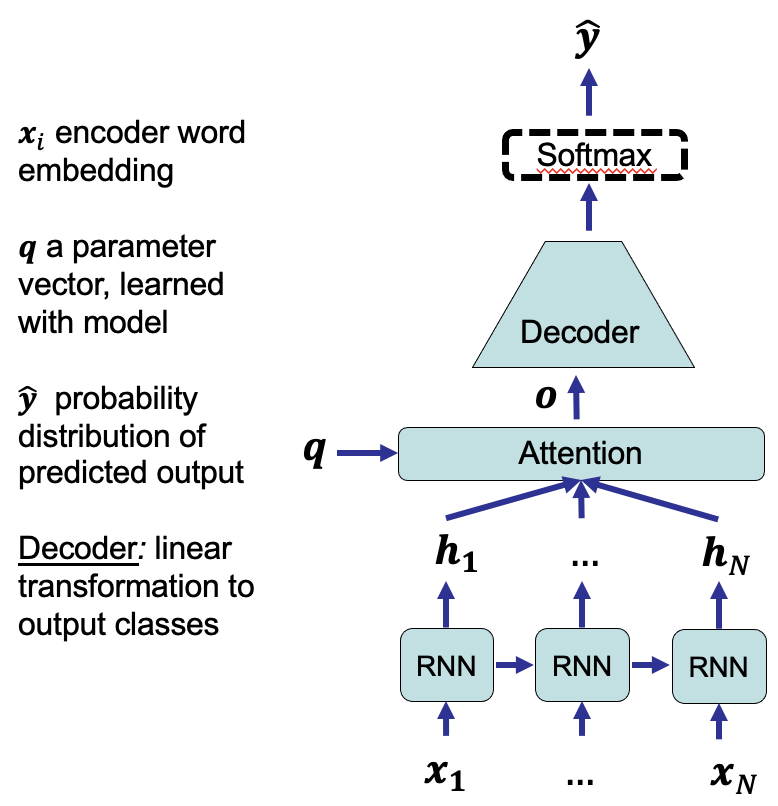

The implementation of the basic architecture of `ClassificationAttentionModel` should cover the following points:

**Baseline model**  

- **Embeddings & RNN Layer (1 points).** The baseline model first fetches the corresponding embeddings of the word IDs of a given batch. Next, a bidirectional LSTM/GRU layer is applied to the word embeddings. The hidden states of this RNN model can be seen as the contextual embeddings of the underlying word embeddings, and will be used in the next layer instead of the original word embeddings.

- **Attention Layer (4 points).** To create the Attention layer, implement an attention network that satisfies the needs of the assignment, i.e. masking as explained in the following. While it is suggested that you implement this attention network by yourself from scratch, you are allowed to use any available implementation of (single-head) attention networks. Among various implementations, the only ones that you are **NOT allowed** to use in this task are the ones based on multi-heads like `torch.nn.MultiheadAttention`. In the baseline architecture, the Attention network must be the (single-head) basic dot-product. Query vector is defined in the model initialization as *a vector of learnable parameters*, whose values will be learned together with the other model's parameters during training. The hidden states of the previous layer are passed as the values (and keys) to the Attention layer, where the Query vector is the query of the Attention. An important point in the forward pass of the Attention layer is setting correct padding masks. These should mask out the attention weights of the padded tokens of each batch. The masks excludes the corresponding vectors of these padded tokens from the calculations in Attention. If the mask is not passed correctly, the padded items will be counted in the Softmax of the Attention layer, and influence other attention weights. A sign that it is working correctly is that final attention weights of the corresponding vectors of the padded tokens are equal to zero. 

- **Prediction Layer (1 points).** The output of the Attention layer for each batch is the corresponding document embedding, passed to the decoder layer (a linear projection) and softmax to predict the probability distribution of the output classes.

- **General model functionality (1 points).** 


**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Attention Type (1 point).** Implement another type of single-head Attention other than basic dot-product.

**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

In [63]:
DEVICE = torch.device("cuda:0") if torch.cuda.is_available() else torch.device('cpu')
DEVICE

device(type='cuda', index=0)

In [64]:
attention_model_params_dict = dict(    
    # architecture config
    architecture = dict(
        hidden_dim = 256,
        bidirectional = True
    ),
    # hyperparameters config
    hyperparams = dict(
        batch_size = 64,
        lr = 5e-4,
        es_patience = 5, # number of epochs with no improvement before training stops
        es_delta = 0.0, # min change to count as an improvement
        save_path = './saves/checkpoint_attention.pt',
        weight_decay = 0  # L2 regularization for Adam
    ),    
    # preparing config template for different model variations
    model_variations = dict(
        model_name = 'ATT_Baseline',
        rnn_layer = True,
        scaled_attention = False # different attention type: scaled dot product attention
    ),
    # embedding layer config
    embeddings = dict(
        num_embeddings = glove_floated.shape[0],
        embedding_dim = glove_floated.shape[1]
    )
)

model_params = Structor(attention_model_params_dict)

In [65]:
train_dloader = DataLoader(train_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=True, collate_fn=batch_fn) # drop_last = False: last smaller minibatch is kept; collate_fn = batch_fn: used for padding sequences with shorter length 
val_dloader = DataLoader(val_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)
test_dloader = DataLoader(test_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)

In [69]:
class ClassificationAttentionModel(torch.nn.Module):
    def __init__(self, params:object, use_device=False):
        super(ClassificationAttentionModel, self).__init__()
        
        self.use_device = use_device
        
        self.num_embeddings = params.embeddings['num_embeddings']
        self.embedding_dim = params.embeddings['embedding_dim']
        self.rnn_layer = params.model_variations['rnn_layer']
        self.hidden_dim = params.architecture['hidden_dim']
        
        # Embedding lookup table
        self.embeddings = torch.nn.Embedding(num_embeddings=self.num_embeddings, # size of dictionary 1935
                                             embedding_dim=self.embedding_dim, # WE vector length 200
                                             padding_idx=0)
        self.embeddings.weight.data.copy_(glove_floated)

        if self.rnn_layer == True:
            # Bidirectional LSTM
            if params.architecture['bidirectional']:
                self.num_dir = 2 
            else: self.num_dir = 1
            self.lstm = torch.nn.LSTM(self.embedding_dim, self.hidden_dim,  batch_first = True,
                                      bidirectional = params.architecture['bidirectional'])
            # Feature dimension (of Value)
            feature_dim = self.hidden_dim * self.num_dir
        else: 
            feature_dim = self.embedding_dim
        
        # Attention
        query = torch.zeros(feature_dim, 1) # (feature_dim, output_length)
        torch.nn.init.uniform_(query, -1.0, 1.0) # initialize parameters, alternative: torch.nn.init.kaiming_uniform_(query)
        self.query = torch.nn.Parameter(query)
        # Scaled dot product attention
        if params.model_variations['scaled_attention'] == True:
            self.scaling = np.sqrt(feature_dim)
        else: self.scaling = 1 # Basic dot product attention (no scaling of attention scores)
        
        self.linear = torch.nn.Linear(feature_dim, len(train_dataset.all_classes())) # (feature_dim, number of classes = 12)
        
    def forward(self, x):
        embed_batch = batched_sentence_lookup(x, self.embeddings, self.use_device) # (batch_size, document_size, embeddings_dim)
        
        if self.rnn_layer == True:
            value, _ = self.lstm(embed_batch) # value (output): (batch_size, sequence length, hidden_dim*num_dir), h_n/c_n: (num_dir, batch_size, hidden_dim)
        else: 
            value = embed_batch
        
        #Attention
        attention_scores = torch.matmul(value, self.query) / self.scaling # (batch_size, seq_length, output_length)
        print(attention_scores.shape, self.query.shape)
        #Mask
        mask = (x != 0).unsqueeze(-1)
        attention_scores = attention_scores.masked_fill(mask == 0, -float('Inf'))
        attention_weights = F.softmax(attention_scores, dim=1)
        self.attention_weights = attention_weights #self. for Task D
        output = torch.bmm(attention_weights.transpose(2,1), value) # (batch_size, out_length, feature_dim)
        print(output.shape)
        
        logit = self.linear(output.squeeze())
        
        return logit

In [70]:
model = ClassificationAttentionModel(model_params, use_device=True)
trainer = NNTrainLoop(model_params, model)
trainer.train(train_dloader)
trainer.test(test_dloader)

torch.Size([64, 50, 1]) torch.Size([512, 1])
torch.Size([64, 1, 512])
torch.Size([64, 50, 1]) torch.Size([512, 1])
torch.Size([64, 1, 512])
torch.Size([64, 50, 1]) torch.Size([512, 1])
torch.Size([64, 1, 512])


KeyboardInterrupt: 

### Baseline model

In [14]:
model = ClassificationAttentionModel(model_params, use_device=False)
trainer = NNTrainLoop(model_params, model)
trainer.train(train_dloader)
trainer.test(test_dloader)

Epoch 1/15 | Training Loss: 2.113 | Training Accuracy 0.295 
 Validation Loss: 1.864 | Validation Accuracy: 0.400
Epoch 2/15 | Training Loss: 1.609 | Training Accuracy 0.506 
 Validation Loss: 1.519 | Validation Accuracy: 0.534
Validation accuracy increased (0.400000 --> 0.534444).  Saving model ...
Epoch 3/15 | Training Loss: 1.297 | Training Accuracy 0.605 
 Validation Loss: 1.359 | Validation Accuracy: 0.584
Validation accuracy increased (0.534444 --> 0.584444).  Saving model ...
Epoch 4/15 | Training Loss: 1.170 | Training Accuracy 0.637 
 Validation Loss: 1.343 | Validation Accuracy: 0.583
EarlyStopper counter: 1 out of 5
Epoch 5/15 | Training Loss: 1.076 | Training Accuracy 0.665 
 Validation Loss: 1.305 | Validation Accuracy: 0.599
Validation accuracy increased (0.584444 --> 0.598889).  Saving model ...
Epoch 6/15 | Training Loss: 1.006 | Training Accuracy 0.679 
 Validation Loss: 1.304 | Validation Accuracy: 0.608
Validation accuracy increased (0.598889 --> 0.608333).  Saving m

tensor([1, 5, 4, 3, 5, 3, 3, 3])

### No RNN

In [15]:
variation_no_rnn_params = copy.deepcopy(model_params)
variation_no_rnn_params.model_variations['model_name'] = 'ATT_no_rnn'

variation_no_rnn_params.hyperparams['save_path'] = './saves/checkpoint_att_no_rnn.pt'
variation_no_rnn_params.model_variations['rnn_layer'] = False

model = ClassificationAttentionModel(variation_no_rnn_params, use_device=False)
trainer = NNTrainLoop(variation_no_rnn_params, model)
trainer.train(train_dloader, n_epochs = 15)
trainer.test(test_dloader)

Epoch 1/15 | Training Loss: 2.367 | Training Accuracy 0.272 
 Validation Loss: 2.170 | Validation Accuracy: 0.424
Epoch 2/15 | Training Loss: 1.912 | Training Accuracy 0.524 
 Validation Loss: 1.738 | Validation Accuracy: 0.546
Validation accuracy increased (0.424444 --> 0.546111).  Saving model ...
Epoch 3/15 | Training Loss: 1.562 | Training Accuracy 0.583 
 Validation Loss: 1.512 | Validation Accuracy: 0.582
Validation accuracy increased (0.546111 --> 0.581667).  Saving model ...
Epoch 4/15 | Training Loss: 1.395 | Training Accuracy 0.608 
 Validation Loss: 1.415 | Validation Accuracy: 0.595
Validation accuracy increased (0.581667 --> 0.595000).  Saving model ...
Epoch 5/15 | Training Loss: 1.303 | Training Accuracy 0.623 
 Validation Loss: 1.350 | Validation Accuracy: 0.607
Validation accuracy increased (0.595000 --> 0.607222).  Saving model ...
Epoch 6/15 | Training Loss: 1.237 | Training Accuracy 0.641 
 Validation Loss: 1.315 | Validation Accuracy: 0.608
Validation accuracy incr

tensor([10,  7,  4,  3, 11,  3,  3,  3])

### Scaled dot-product attention

In [16]:
variation_scaled_attention_params = copy.deepcopy(model_params)
variation_scaled_attention_params.model_variations['model_name'] = 'ATT_scaled_attention'

variation_scaled_attention_params.hyperparams['save_path'] = './saves/checkpoint_att_scaled_attention.pt'
variation_scaled_attention_params.model_variations['scaled_attention'] = True

model = ClassificationAttentionModel(variation_scaled_attention_params, use_device=False)
trainer = NNTrainLoop(variation_scaled_attention_params, model)
trainer.train(train_dloader, n_epochs = 15)
trainer.test(test_dloader)

Epoch 1/15 | Training Loss: 2.086 | Training Accuracy 0.287 
 Validation Loss: 1.847 | Validation Accuracy: 0.388
Epoch 2/15 | Training Loss: 1.590 | Training Accuracy 0.493 
 Validation Loss: 1.519 | Validation Accuracy: 0.531
Validation accuracy increased (0.387778 --> 0.530556).  Saving model ...
Epoch 3/15 | Training Loss: 1.297 | Training Accuracy 0.603 
 Validation Loss: 1.345 | Validation Accuracy: 0.584
Validation accuracy increased (0.530556 --> 0.583889).  Saving model ...
Epoch 4/15 | Training Loss: 1.144 | Training Accuracy 0.641 
 Validation Loss: 1.295 | Validation Accuracy: 0.596
Validation accuracy increased (0.583889 --> 0.595556).  Saving model ...
Epoch 5/15 | Training Loss: 1.055 | Training Accuracy 0.666 
 Validation Loss: 1.298 | Validation Accuracy: 0.586
EarlyStopper counter: 1 out of 5
Epoch 6/15 | Training Loss: 0.995 | Training Accuracy 0.684 
 Validation Loss: 1.289 | Validation Accuracy: 0.595
EarlyStopper counter: 2 out of 5
Epoch 7/15 | Training Loss: 0.9

tensor([ 5,  3,  4,  3, 11,  3,  3,  3])

### Report and discussion

Model 2 (without RNN layer) performs best, followed by Model 3 (with scaled dot-product attention) and the baseline model.

In [123]:
%load_ext tensorboard
%tensorboard --logdir 'saves/tb_runs/ATT'

In [18]:
# make dataframe from tensorboard scalars
df = pd.DataFrame(columns = ['Model', 'Validation Accuracy', 'Test Accuracy'])

for f in os.scandir('saves/tb_runs/ATT/'):
    if f.is_dir():
        folder = f.path
    
        event_accumulator = EventAccumulator(folder)
        event_accumulator.Reload()

        val = event_accumulator.Scalars('Accuracy/validation')
        val_acc = max([x.value for x in val])
        test = event_accumulator.Scalars('Test_Accuracy')
        test_acc = max([x.value for x in test])

        df_new = pd.DataFrame({'Model': os.path.basename(f.path), 'Validation Accuracy': val_acc, 'Test Accuracy': test_acc}, index=[0])
        df = pd.concat([df, df_new], ignore_index = True)
    
df.sort_values(by=['Test Accuracy'], ascending=False)

,Model,Validation Accuracy,Test Accuracy
1,no_rnn,0.628333,0.633333
0,scaled_attention,0.595556,0.613889
2,Baseline,0.611111,0.607222


<a name="section-classification-transformer"></a><h2 style="color:rgb(0,120,170)">Task B: Document Classification with Transformer (10 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Transformer Decoder. This model is called **`ClassificationTransformerModel`** in the code, containing all various variants as explained later. 

The implementation of the basic architecture of `ClassificationTransformerModel` covers the following points:

**Baseline model:** The architecture of baseline `ClassificationTransformerModel`is the exactly the same as the one of `ClassificationAttentionModel`. The only difference is that `ClassificationTransformerModel` replaces the Attention layer with a Transformer Decoder. 

- **Transformer Decoder (3 points).** Use `torch.nn.TransformerDecoder` class or any other implementation of Transformer Decoder. The baseline model consists of one layer of Transformer Decoder and is defined with default parameters of Transformer Decoder. As before, Query vector is defined separately, and used as the query of the Transformer.

- **Model Functionality (1 point).**

**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationTransformerModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Transformer Encoder (3 point).** Replace the RNN layer with a Transformer Encoder. Similar to the RNN, the aim of this layer is to provide contextual embeddings of the input word embeddings. 

- **Number of heads (1 point).** Study the effect of increasing/decreasing the number of heads of the Transformer Decoder.

- **Number of layers (1 point).** Study the effect of increasing the layers of the Transformer Decoder.


**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.
</div>

In [118]:
transformer_model_params_dict = dict(    
    # architecture config
    architecture = dict(
        hidden_dim = 200, # for some reason transformer layers require this to be the shape, could not find out the proper reason
        bidirectional = False,
        num_dims = 2048
    ),
    # hyperparameters config
    hyperparams = dict(
        batch_size = 64,
        lr = 5e-4,
        es_patience = 5, # number of epochs with no improvement before training stops
        es_delta = 0.0, # min change to count as an improvement
        save_path = './saves/checkpoint_transformer.pt',
        weight_decay = 0  # L2 regularization for Adam
    ),    
    # preparing config template for different model variations
    model_variations = dict(
        model_name = 'TRA_Baseline',
        encoder_layer = True,
        num_heads = 1,
        num_layers = 1
    ),
    # embedding layer config
    embeddings = dict(
        num_embeddings = glove_floated.shape[0],
        embedding_dim = glove_floated.shape[1]
    )
)

model_params = Structor(transformer_model_params_dict)

In [119]:
train_dloader = DataLoader(train_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=True, collate_fn=batch_fn) # drop_last = False: last smaller minibatch is kept; collate_fn = batch_fn: used for padding sequences with shorter length 
val_dloader = DataLoader(val_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)
test_dloader = DataLoader(test_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False, collate_fn=batch_fn)

In [120]:
class ClassificationTransformerModel(torch.nn.Module):
    def __init__(self, params: object, use_device: bool = False):
        super(ClassificationTransformerModel, self).__init__()
        
        self.use_device = use_device
        
        self.num_embeddings = params.embeddings['num_embeddings']
        self.embedding_dim = params.embeddings['embedding_dim']
        self.encoder_layer = params.model_variations['encoder_layer']
        self.hidden_dim = params.architecture['hidden_dim']
        
        # Embedding lookup table
        self.embeddings = torch.nn.Embedding(num_embeddings=self.num_embeddings, # size of dictionary 1935
                                             embedding_dim=self.embedding_dim, # WE vector length 200
                                             padding_idx=0)
        self.embeddings.weight.data.copy_(glove_floated)

        if self.encoder_layer == False:
            # Bidirectional LSTM
            if params.architecture['bidirectional']:
                self.num_dir = 2 
            else: 
                self.num_dir = 1
                
            self.lstm = torch.nn.LSTM(self.embedding_dim, 
                                      self.hidden_dim,  
                                      batch_first = True,
                                      bidirectional = params.architecture['bidirectional'])
            # Feature dimension (of Value)
            print(self.hidden_dim)
            feature_dim = self.hidden_dim * self.num_dir
            
        else: 
            # Transformer Encoder
            
            transformer_encoder_layer = torch.nn.TransformerEncoderLayer(d_model=self.embedding_dim,
                                                                         nhead=params.model_variations['num_heads'],
                                                                         dim_feedforward=params.architecture['num_dims'],
                                                                         batch_first=True)
            self.transformer_encoder = torch.nn.TransformerEncoder(transformer_encoder_layer,
                                                                   num_layers=params.model_variations['num_layers'])
            feature_dim = self.hidden_dim
            
        
        # Query
        query = torch.zeros(feature_dim, 1) # (feature_dim, output_length)
        torch.nn.init.uniform_(query, -1.0, 1.0) # initialize parameters, alternative: torch.nn.init.kaiming_uniform_(query)
        self.query = torch.nn.Parameter(query)
        
        # Transformer Decoder
        transformer_decoder_layer = torch.nn.TransformerDecoderLayer(d_model=self.embedding_dim,
                                                             nhead=params.model_variations['num_heads'],
                                                             dim_feedforward=params.architecture['num_dims'],
                                                             batch_first=True)
        self.transformer_decoder = torch.nn.TransformerDecoder(transformer_decoder_layer, 
                                                               num_layers=params.model_variations['num_layers'])
        
        self.linear = torch.nn.Linear(feature_dim, len(train_dataset.all_classes())) # (feature_dim, number of classes = 12)
        
    def forward(self, x):
        embed_batch = batched_sentence_lookup(x, self.embeddings, self.use_device) # (batch_size, document_size, embeddings_dim)
        
        if self.encoder_layer == False:
            value, _ = self.lstm(embed_batch) # value (output): (batch_size, sequence length, hidden_dim*num_dir), h_n/c_n: (num_dir, batch_size, hidden_dim)
            query_scores = torch.matmul(value, self.query)
            output = torch.bmm(query_scores.transpose(2,1), value)
            out = self.transformer_decoder(output, value)
        else: 
            value = self.transformer_encoder(embed_batch)
            query_scores = torch.matmul(value, self.query)
            output = torch.bmm(query_scores.transpose(2,1), value)
            out = self.transformer_decoder(output, value)
        
        logit = self.linear(out.squeeze(1))
        return logit

### Baseline Model

In [121]:
model = ClassificationTransformerModel(model_params, use_device=True)
trainer = NNTrainLoop(model_params, model)
trainer.train(train_dloader)
trainer.test(test_dloader)

Epoch 1/15 | Training Loss: 1.819 | Training Accuracy 0.429 
 Validation Loss: 1.383 | Validation Accuracy: 0.582
Epoch 2/15 | Training Loss: 1.205 | Training Accuracy 0.627 
 Validation Loss: 1.187 | Validation Accuracy: 0.624
Validation accuracy increased (0.582222 --> 0.624444).  Saving model ...
Epoch 3/15 | Training Loss: 0.997 | Training Accuracy 0.681 
 Validation Loss: 1.195 | Validation Accuracy: 0.614
EarlyStopper counter: 1 out of 5
Epoch 4/15 | Training Loss: 0.882 | Training Accuracy 0.711 
 Validation Loss: 1.189 | Validation Accuracy: 0.625
Validation accuracy increased (0.624444 --> 0.625000).  Saving model ...
Epoch 5/15 | Training Loss: 0.782 | Training Accuracy 0.739 
 Validation Loss: 1.242 | Validation Accuracy: 0.615
EarlyStopper counter: 1 out of 5
Epoch 6/15 | Training Loss: 0.691 | Training Accuracy 0.761 
 Validation Loss: 1.381 | Validation Accuracy: 0.589
EarlyStopper counter: 2 out of 5
Epoch 7/15 | Training Loss: 0.623 | Training Accuracy 0.781 
 Validatio

tensor([ 9,  5,  4,  3, 11,  3,  3,  3], device='cuda:0')

### Transformer Encoder

In [124]:
variation_transformer_encoder_params = copy.deepcopy(model_params)
variation_transformer_encoder_params.model_variations['model_name'] = 'TRA_Baseline_with_encoder'


variation_transformer_encoder_params.hyperparams['save_path'] = './saves/checkpoint_transformer_with_encoder.pt'
variation_transformer_encoder_params.model_variations['encoder_layer'] = True

model = ClassificationTransformerModel(variation_transformer_encoder_params, use_device=True)
trainer = NNTrainLoop(variation_transformer_encoder_params, model)
trainer.train(train_dloader)
trainer.test(test_dloader)

Epoch 1/15 | Training Loss: 1.835 | Training Accuracy 0.428 
 Validation Loss: 1.443 | Validation Accuracy: 0.574
Epoch 2/15 | Training Loss: 1.283 | Training Accuracy 0.608 
 Validation Loss: 1.246 | Validation Accuracy: 0.606
Validation accuracy increased (0.574444 --> 0.606111).  Saving model ...
Epoch 3/15 | Training Loss: 1.063 | Training Accuracy 0.659 
 Validation Loss: 1.203 | Validation Accuracy: 0.618
Validation accuracy increased (0.606111 --> 0.617778).  Saving model ...
Epoch 4/15 | Training Loss: 0.928 | Training Accuracy 0.697 
 Validation Loss: 1.257 | Validation Accuracy: 0.613
EarlyStopper counter: 1 out of 5
Epoch 5/15 | Training Loss: 0.825 | Training Accuracy 0.727 
 Validation Loss: 1.234 | Validation Accuracy: 0.617
EarlyStopper counter: 2 out of 5
Epoch 6/15 | Training Loss: 0.733 | Training Accuracy 0.752 
 Validation Loss: 1.266 | Validation Accuracy: 0.602
EarlyStopper counter: 3 out of 5
Epoch 7/15 | Training Loss: 0.654 | Training Accuracy 0.778 
 Validatio

tensor([10,  3,  4,  3, 11,  3,  3,  3], device='cuda:0')

### Different amount of decoder layers

In [125]:
tuning_params = [2, 3, 4]
variation_decoder_layers_params = copy.deepcopy(model_params)

for tunable in tuning_params:
    print(f'Training with {tunable} decoder layers')
    variation_decoder_layers_params.model_variations['num_layers'] = tunable
    variation_decoder_layers_params.model_variations['model_name'] = model_name = f'TRA_decoder_layers={tunable}'
    variation_decoder_layers_params.hyperparams['save_path'] = f'./saves/checkpoint_{model_name}.pt'
    
    model = ClassificationTransformerModel(variation_decoder_layers_params, use_device=True)
    trainer = NNTrainLoop(variation_decoder_layers_params, model)
    
    # avoid retraining everything
    if os.path.exists(variation_decoder_layers_params.hyperparams['save_path']):
        print(f'Found a checkpoint for dropout_rate = {tunable}, continue without retraining.')
        trainer.test(test_dloader)
    else:
        trainer.train(train_dloader, n_epochs=10)
        trainer.test(test_dloader)
        
    print('\n')

Training with 2 decoder layers
Epoch 1/10 | Training Loss: 2.097 | Training Accuracy 0.309 
 Validation Loss: 1.780 | Validation Accuracy: 0.456
Epoch 2/10 | Training Loss: 1.468 | Training Accuracy 0.558 
 Validation Loss: 1.419 | Validation Accuracy: 0.574
Validation accuracy increased (0.456111 --> 0.574444).  Saving model ...
Epoch 3/10 | Training Loss: 1.240 | Training Accuracy 0.621 
 Validation Loss: 1.340 | Validation Accuracy: 0.587
Validation accuracy increased (0.574444 --> 0.586667).  Saving model ...
Epoch 4/10 | Training Loss: 1.143 | Training Accuracy 0.644 
 Validation Loss: 1.268 | Validation Accuracy: 0.623
Validation accuracy increased (0.586667 --> 0.623333).  Saving model ...
Epoch 5/10 | Training Loss: 1.036 | Training Accuracy 0.670 
 Validation Loss: 1.247 | Validation Accuracy: 0.609
EarlyStopper counter: 1 out of 5
Epoch 6/10 | Training Loss: 0.956 | Training Accuracy 0.696 
 Validation Loss: 1.276 | Validation Accuracy: 0.616
EarlyStopper counter: 2 out of 5


### Different amount of decoder heads

In [128]:
tuning_params = [2, 4, 8]
variation_decoder_layers_params = copy.deepcopy(model_params)

for tunable in tuning_params:
    print(f'Training with {tunable} decoder heads')
    variation_decoder_layers_params.model_variations['num_heads'] = tunable
    variation_decoder_layers_params.model_variations['model_name'] = model_name = f'TRA_decoder_heads={tunable}'
    variation_decoder_layers_params.hyperparams['save_path'] = f'./saves/checkpoint_{model_name}.pt'
    
    model = ClassificationTransformerModel(variation_decoder_layers_params, use_device=True)
    trainer = NNTrainLoop(variation_decoder_layers_params, model)
    
    # avoid retraining everything
    if os.path.exists(variation_decoder_layers_params.hyperparams['save_path']):
        print(f'Found a checkpoint for dropout_rate = {tunable}, continue without retraining.')
        trainer.test(test_dloader)
    else:
        trainer.train(train_dloader, n_epochs=10)
        trainer.test(test_dloader)
        
    print('\n')

Training with 2 decoder heads
Epoch 1/10 | Training Loss: 1.693 | Training Accuracy 0.472 
 Validation Loss: 1.322 | Validation Accuracy: 0.590
Epoch 2/10 | Training Loss: 1.157 | Training Accuracy 0.636 
 Validation Loss: 1.259 | Validation Accuracy: 0.616
Validation accuracy increased (0.590000 --> 0.615556).  Saving model ...
Epoch 3/10 | Training Loss: 0.994 | Training Accuracy 0.680 
 Validation Loss: 1.195 | Validation Accuracy: 0.625
Validation accuracy increased (0.615556 --> 0.625000).  Saving model ...
Epoch 4/10 | Training Loss: 0.873 | Training Accuracy 0.714 
 Validation Loss: 1.256 | Validation Accuracy: 0.613
EarlyStopper counter: 1 out of 5
Epoch 5/10 | Training Loss: 0.762 | Training Accuracy 0.746 
 Validation Loss: 1.308 | Validation Accuracy: 0.612
EarlyStopper counter: 2 out of 5
Epoch 6/10 | Training Loss: 0.688 | Training Accuracy 0.763 
 Validation Loss: 1.351 | Validation Accuracy: 0.604
EarlyStopper counter: 3 out of 5
Epoch 7/10 | Training Loss: 0.627 | Train

In [ ]:
%load_ext tensorboard
%tensorboard --logdir 'saves/tb_runs/TRA'

In [129]:
# make dataframe from tensorboard scalars
df = pd.DataFrame(columns = ['Model', 'Validation Accuracy', 'Test Accuracy'])

for f in os.scandir('saves/tb_runs/TRA/'):
    if f.is_dir():
        folder = f.path
    
        event_accumulator = EventAccumulator(folder)
        event_accumulator.Reload()

        val = event_accumulator.Scalars('Accuracy/validation')
        val_acc = max([x.value for x in val])
        test = event_accumulator.Scalars('Test_Accuracy')
        test_acc = max([x.value for x in test])

        df_new = pd.DataFrame({'Model': os.path.basename(f.path), 'Validation Accuracy': val_acc, 'Test Accuracy': test_acc}, index=[0])
        df = pd.concat([df, df_new], ignore_index = True)
    
df.sort_values(by=['Test Accuracy'], ascending=False)

,Model,Validation Accuracy,Test Accuracy
1,Baseline_with_encoder,0.617778,0.641667
2,decoder_heads=2,0.625000,0.641111
3,decoder_heads=4,0.630556,0.636667
0,Baseline,0.625000,0.633333
4,decoder_heads=8,0.623333,0.625556
5,decoder_layers=2,0.623333,0.622778
6,decoder_layers=3,0.609444,0.621111
7,decoder_layers=4,0.601111,0.598333


#### Task B results discussion:

After running experiments with different variations of Transformer classification model, we found out that model variation that uses encoder instead of LSTM layer achieves the best testing accuracy out of all tested variations. 

Second of all, we can see that increasing amount of transformer's heads doesn't necessarily lead to better performance, e.g. we can observe a small increase in accuracy when using 2 or 4 heads, but once we increase it to 8 it drops below the baseline.

And finally, change in amount of decoder layers doesn't contribute to increase in accuracy; all variations were strictly below the baseline performance.

<a name="section-classification-bert"></a><h2 style="color:rgb(0,120,170)">Task C: Document Classification with BERT (5 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using BERT. This model is called **`ClassificationBERTModel`**.

**Model Functionality (4 points):** Use the `transformers` library from `huggingface` to load a (small) pre-trained BERT model for document classification. Select a BERT model according to your available resources. The available models can be found [here](https://huggingface.co/models) and [here](https://github.com/google-research/bert). The weights of the BERT model should be fine-tuned using the available training data of the task. Consult the documentation of `huggingface` for a correct implementation of the classifier. 

**Reporting and discussion (1 point).** Evaluate the model and report the results.

</div>

In [14]:
from transformers import DistilBertModel, DistilBertConfig, DistilBertTokenizer
from transformers import BertModel, BertTokenizer

import pandas as pd
import numpy as np

from torch.utils.data import DataLoader, Dataset
import torch
import os

train_data, test_data, val_data = pd.read_csv('data/preproc_train_set.csv'), pd.read_csv('data/preproc_test_set.csv'), pd.read_csv('data/preproc_val_set.csv')
train_text, train_labels = train_data[' text'], train_data[' label']
test_text, test_labels = test_data[' text'], test_data[' label']
val_text, val_labels = val_data[' text'], val_data[' label']

tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-mini',
                                          do_lower_case=True, 
                                          return_tensors='pt')  # loading mini tokenizer

In [28]:
DEVICE = torch.device("cuda:0") if torch.cuda.is_available() else torch.device('cpu')
DEVICE

bert_model_params_dict = dict(    
    # hyperparameters config
    architecture = dict(
        linear_neurons = 128,
        dropout_rate = 0.25
    ),
    hyperparams = dict(
        batch_size = 64,
        lr = 5e-4,
        es_patience = 5, # number of epochs with no improvement before training stops
        es_delta = 0.0, # min change to count as an improvement
        save_path = './saves/checkpoint_transformer.pt',
        weight_decay = 0  # L2 regularization for Adam
    ),
    model_variations = dict(
        model_name='BRT_Baseline'
    ),
    # embedding layer config
    embeddings = dict(
        num_embeddings = glove_floated.shape[0],
        embedding_dim = glove_floated.shape[1]
    )
)

model_params = Structor(bert_model_params_dict)

In [29]:
class BERTdataset(Dataset):
    def __init__(self, text, labels, tokenizer, max_length=512):
        # assert both text and labels arrays are pd.Series type
        assert type(text) == pd.Series, f'Expected text input to be of type pd.Series, received type {type(text)}'
        assert type(labels) == pd.Series, f'Expected labels input to be of type pd.Series, received type {type(labels)}'

        self.func = lambda x: int(x) if x.isdigit() else x
        self.labels = labels.values
        self.texts = [tokenizer(sentence, 
                               padding='max_length', max_length = max_length, truncation=True,
                               return_tensors="pt") for sentence in text]
        
    def __len__(self):
        return len(self.labels)
    
    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)
        return batch_texts, batch_y
    
    def all_classes(self):
        return torch.tensor(sorted(list(set(self.labels))))

In [30]:
bert_train_dataset, bert_test_dataset, bert_val_dataset = BERTdataset(train_text, train_labels, tokenizer), \
                                                          BERTdataset(test_text, test_labels, tokenizer), \
                                                          BERTdataset(val_text, val_labels, tokenizer)

In [31]:
train_dloader = DataLoader(bert_train_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=True)
val_dloader = DataLoader(bert_val_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False)
test_dloader = DataLoader(bert_test_dataset, batch_size = model_params.hyperparams['batch_size'], drop_last=False, shuffle=False)

In [32]:
import torch.nn.functional as F

class ClassificationBERTModel(torch.nn.Module):
    def __init__(self, config: object):
        super(ClassificationBERTModel, self).__init__()
        
        self.bert_embeddings = BertModel.from_pretrained('prajjwal1/bert-tiny') # loading mini model
        print(self.bert_embeddings.num_parameters())
        self.dropout = torch.nn.Dropout(config.architecture['dropout_rate'])
        self.linear1 = torch.nn.Linear(config.architecture['linear_neurons'], config.architecture['linear_neurons']//2)
        self.relu = torch.nn.ReLU(True)
        self.linear2 = torch.nn.Linear(config.architecture['linear_neurons']//2, len(bert_train_dataset.all_classes()))
    
    def forward(self, input_ids: torch.Tensor, attention_mask: torch.Tensor):
        _, bert_out = self.bert_embeddings(input_ids=input_ids, 
                                           attention_mask=attention_mask,
                                           return_dict=False)
        out = self.dropout(bert_out)
        out = self.linear1(out)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [33]:
class BERTTrainLoop:
    def __init__(self, params:object, 
                 model:torch.nn.Module,
                 use_device=True):
        '''
        Inputs:
        - params:object: nested dictionary wrapped into class object
        - model:torch.nn.Module: PyTorch model
        - use_device:bool: use CUDA device
        
        '''
        
        self.early_stop = False
        self.delta = params.hyperparams['es_delta']
        self.patience = params.hyperparams['es_patience']
        self.ckp_path = params.hyperparams['save_path']
        self.use_device = use_device
        
        self.val_acc_max = np.Inf
        self.counter = 0
        self.best_score = None
        
        self.model = model
        
        if self.use_device:
            self.model = self.model.to(DEVICE)
        
        # loss function and optimizer
        self.optimizer = torch.optim.Adam(self.model.parameters(), 
                                          lr=params.hyperparams['lr'], 
                                          weight_decay=params.hyperparams['weight_decay'])

            
        self.criterion = torch.nn.CrossEntropyLoss()
        
        self.batch_size = params.hyperparams['batch_size']
        
        # create writer for tensorboard
        model_name = params.model_variations['model_name']
        self.writer = SummaryWriter(log_dir=f'saves/tb_runs/{model_name[0:3]}/{model_name[4:]}')
    
    def early_stopper(self, val_acc):
        """
        Stops the training if validation accuracy doesn't improve after a given patience.
        """
        model = self.model
        score = val_acc

        if self.best_score is None:
            self.best_score = score
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopper counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            print(f'Validation accuracy increased ({self.val_acc_max:.6f} --> {val_acc:.6f}).  Saving model ...')
            torch.save(model.state_dict(), self.ckp_path)
            self.val_acc_max = val_acc
            self.counter = 0
    
    def evaluate(self, val_dloader: DataLoader, valid_losses: list):
        
        model = self.model
        
        overall_correct = 0
        model.eval() # evaluate model
        for data, target in val_dloader:
            
            input_id = data['input_ids'].squeeze(1)
            mask = data['attention_mask']
                
            if self.use_device:
                input_id, mask, target = input_id.to(DEVICE), mask.to(DEVICE), target.to(DEVICE)
            
            output = model(input_id, mask)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
            valid_losses.append(loss.item())
            
        return overall_correct / len(val_dloader.dataset)
    
    def test(self, test_dloader: DataLoader):
        # load checkpoint if exists
        
        model = self.model
        
        try:
            model.load_state_dict(torch.load(self.ckp_path))
        except FileNotFoundError:
            pass
        
        model.eval() # evaluate model
        
        overall_correct = 0
        for data, target in test_dloader:
            input_id = data['input_ids'].squeeze(1)
            mask = data['attention_mask']
                
            if self.use_device:
                input_id, mask, target = input_id.to(DEVICE), mask.to(DEVICE), target.to(DEVICE)
            
            output = model(input_id, mask)
            loss = self.criterion(output, target)
            
            y_hat = torch.argmax(output, dim=1)
            overall_correct += torch.sum(y_hat == target)
        
        testing_accuracy = overall_correct / len(test_dloader.dataset)
        print(f'Testing Accuracy: {testing_accuracy:.3f}')
        
        # tensorboard
        self.writer.add_scalar('Test_Accuracy', testing_accuracy)
            
        return y_hat

    def train(self, train_dloader: DataLoader, n_epochs: int = 15):
        
        model = self.model
        
        train_losses = []
        valid_losses = []
        test_losses = []

        for epoch in range(1, n_epochs + 1):
            overall_correct = 0
            
            model.train()
            for batch, (data, target) in enumerate(train_dloader, 1):
                self.optimizer.zero_grad()
                input_id = data['input_ids'].squeeze(1)
                mask = data['attention_mask']
                
                if self.use_device:
                    input_id, mask, target = input_id.to(DEVICE), mask.to(DEVICE), target.to(DEVICE)
                                
                output = model(input_id, mask)
                y_hat = torch.argmax(output, dim=1)
                
                loss = self.criterion(output, target)
                overall_correct += torch.sum(y_hat == target)
                
                loss.backward()
                self.optimizer.step()
                
                train_losses.append(loss.item())

            # compute train and val accuracies
            train_accuracy = overall_correct/len(train_dloader.dataset)
            val_accuracy = self.evaluate(val_dloader, valid_losses)

            train_loss = np.average(train_losses)
            valid_loss = np.average(valid_losses)
            
            train_losses, valid_losses = [], []

            print(f'Epoch {epoch}/{n_epochs} | Training Loss: {train_loss:.3f} | Training Accuracy {train_accuracy:.3f} \n',
                  f'Validation Loss: {valid_loss:.3f} | Validation Accuracy: {val_accuracy:.3f}')

            # tensorboard
            self._write_summary(epoch, train_loss, train_accuracy, valid_loss, val_accuracy, model)
            
            self.early_stopper(val_accuracy)

            if self.early_stop == True:
                print(f"Early stopping occured on epoch {epoch} with latest validation accuracy of {val_accuracy:.3f}")
                break
    
    def _write_summary(self, epoch, train_loss, train_accuracy, validation_loss, validation_accuracy, model):
        self.writer.add_scalar('Loss/train', train_loss, epoch)
        self.writer.add_scalar('Accuracy/train', train_accuracy, epoch)
        self.writer.add_scalar('Loss/validation', validation_loss, epoch)
        self.writer.add_scalar('Accuracy/validation', validation_accuracy, epoch)

In [34]:
model = ClassificationBERTModel(model_params)
trainer = BERTTrainLoop(model_params, model, use_device=True)
trainer.train(train_dloader)
trainer.test(test_dloader)

Some weights of the model checkpoint at prajjwal1/bert-tiny were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


4385920
Epoch 1/15 | Training Loss: 1.931 | Training Accuracy 0.372 
 Validation Loss: 1.451 | Validation Accuracy: 0.594
Epoch 2/15 | Training Loss: 1.277 | Training Accuracy 0.623 
 Validation Loss: 1.268 | Validation Accuracy: 0.621
Validation accuracy increased (0.593889 --> 0.621111).  Saving model ...
Epoch 3/15 | Training Loss: 1.070 | Training Accuracy 0.673 
 Validation Loss: 1.281 | Validation Accuracy: 0.612
EarlyStopper counter: 1 out of 5
Epoch 4/15 | Training Loss: 0.904 | Training Accuracy 0.717 
 Validation Loss: 1.283 | Validation Accuracy: 0.621
Validation accuracy increased (0.621111 --> 0.621111).  Saving model ...
Epoch 5/15 | Training Loss: 0.770 | Training Accuracy 0.763 
 Validation Loss: 1.350 | Validation Accuracy: 0.608
EarlyStopper counter: 1 out of 5
Epoch 6/15 | Training Loss: 0.663 | Training Accuracy 0.791 
 Validation Loss: 1.418 | Validation Accuracy: 0.598
EarlyStopper counter: 2 out of 5
Epoch 7/15 | Training Loss: 0.563 | Training Accuracy 0.828 
 V

tensor([ 3,  7,  4,  3, 11,  3,  3,  3], device='cuda:0')

#### Results Discussion

In our case, BERT achieved worse accuracy score than previous algorithms, it could be due to using 'tiny' model.

Out of all tested models, the best results were achieved using architecture with Transformers.

<a name="section-interpretation"></a><h2 style="color:rgb(0,120,170)">Task D: Interpreting Attention Weights (3 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The aim of this task is to provide an interpretation of the functionality of one of the models, by exploring which words have the higher contributions to the prediction results of some specific documents. 

**Attention weights (2.5 extra points):** Select one of the models trained in the previous tasks as you prefer. Select four documents from test set, such that two are correctly and the other two are incorrectly classified by the model. Next, run the forward pass for each of these documents and extract the corresponding attention weights from the model. Separately for each document, interpret the mechanism of the classifier by looking at the words with the highest attention weights. Do these words – in your opinion – provide important information to the predicted class?

**Visualization (0.5 overall extra points):** Visualize the attention weights over document’s words. Some suggested tools and resources:

https://github.com/minqi/hnatt

https://github.com/jiesutd/Text-Attention-Heatmap-Visualization 

https://github.com/cbaziotis/neat-vision
</div>

In [32]:
import seaborn as sns
from IPython.display import display

model = ClassificationAttentionModel(model_params, use_device=False)
model.load_state_dict(torch.load('./saves/checkpoint_attention.pt'))
model.eval()

subset_indices = [0,1,11,20] # selected test samples
subset = torch.utils.data.Subset(test_dataset, subset_indices)
test_dloader_subset = DataLoader(subset, batch_size = 1, shuffle=False, collate_fn=batch_fn)

labels = pd.read_csv('data/thedeep.labels.txt', header=None)

for test_data, test_target in test_dloader_subset:
    output = model(test_data)
    y_hat = torch.argmax(output)
    print('Prediction: {} ({}) | Target: {} ({})'.format(y_hat.item(), labels.iloc[y_hat.item()][1],test_target.item(),labels.iloc[test_target.item()][1]))
    
    weights = model.attention_weights.squeeze().detach().numpy()
    test_data = test_data.squeeze()
    
    words = [vocab[index-1][0] if index!=0 else 'OOV' for index in test_data]

    df = pd.DataFrame({'Words':words, 'Attention Weights': weights})
    cm = sns.light_palette('blue', as_cmap=True)
    
    display(df.style.background_gradient(axis=0, gmap=df['Attention Weights'], cmap=cm))
    print('')


Prediction: 4 (Health) | Target: 4 (Health)


,Words,Attention Weights
0,minister,0.000008
1,health,0.010497
2,jonglei,0.000726
3,state,0.000042
4,OOV,0.000000
5,OOV,0.000000
6,far,0.000227
7,people,0.000009
8,die,0.000253
9,cholera,0.747045



Prediction: 10 (Shelter) | Target: 10 (Shelter)


,Words,Attention Weights
0,build,0.001508
1,tent,0.882285
2,snow,0.001280
3,OOV,0.000000
4,child,0.000083
5,sleep,0.070763
6,cold,0.008540
7,sick,0.002505
8,add,0.000001
9,OOV,0.000000



Prediction: 11 (WASH) | Target: 2 (Education)


,Words,Attention Weights
0,attack,0.000000
1,civilian,0.000000
2,infrastructure,0.000000
3,idleb,0.000006
4,governorate,0.000000
5,continue,0.000000
6,attack,0.000003
7,health,0.012781
8,care,0.000058
9,facility,0.000074



Prediction: 3 (Food) | Target: 0 (Agriculture)


,Words,Attention Weights
0,somalia,0.000000
1,OOV,0.000000
2,reduction,0.004159
3,rainfall,0.000002
4,somalia,0.000000
5,OOV,0.000000
6,week,0.000012
7,june,0.000017
8,mark,0.000002
9,possible,0.000108


### Discussion:

The weight interpretation was conducted for the Baseline model of the Attention network from Task A.

It can be seen that the attention weights do relate to the classification result.
For the correctly predicted samples the words with very high attention weights are quite meaningful (e.g.: 'cholera' and 'case' for the class 'health' and 'tent', 'sleep' for the class 'shelter'). On the other hand there are also words which one might interpret as meaningful which are not picked up by the attention mechanism (e.g.: 'live' or 'rest' for the class 'shelter').

The misclassified sentences on the other hand have sometimes unexplainable attention weight distributions. For the third inspected sample it can be clearly seen that words were attended to that are indicative of the wrongly predicted class (e.g.: school). For the fourth inspected sample it can be seen that words were weighted highly that don't seem to be meaningful at all (e.g. 'ethopia').

It can be seen that due to the softmax function only very few words are picked out by the attention mechanism and the vast majority has weights close to 0. When inspecting the weights of the scaled dot-product attention this is not as pronounced.